/tmp/ipykernel_9672/3488601037.py:32: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(counts)


         Falling back to preprocessing with `sc.pp.pca` and default params.


/homes/gws/ewein/micromamba/envs/mgVI/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/homes/gws/ewein/micromamba/envs/mgVI/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/homes/gws/ewein/micromamba/envs/mgVI/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


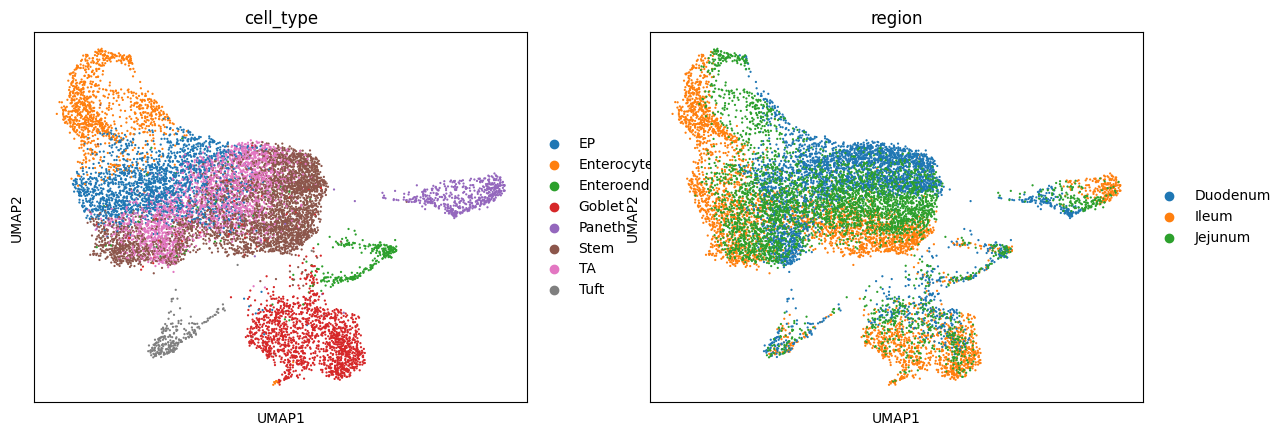

In [1]:
import scanpy as sc
import pandas as pd
import os

# Navigate to https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE92332
# to download the counts matrix
counts = pd.read_csv("GSE92332_Regional_UMIcounts.txt.gz", sep='\t')

counts = counts.transpose() #Gene rows, cells columns --> cells rows, genes columns 

barcodes = []
mice = []
regions = []
cell_types = []

for cell in counts.index:
    barcode, region, mouse, cell_type = cell.split("_")
    mice.append(mouse)
    barcodes.append(barcode)
    cell_types.append(cell_type)
    regions.append(region)

metadata_df = pd.DataFrame(
    {
        "mouse": mice,
        "barcode": barcodes,
        "region": regions,
        "cell_type": cell_types,
    }
)

adata = sc.AnnData(counts)
adata.obs = metadata_df
sc.pp.highly_variable_genes(adata, subset=False, n_top_genes=2000, flavor='seurat_v3')

adata.layers['count'] = adata.X.copy()

sc.pp.normalize_total(adata, target_sum=1e6)
sc.pp.log1p(adata)

adata.raw = adata
adata = adata[:, adata.var["highly_variable"]]

sc.pp.neighbors(adata)
sc.tl.umap(adata)

sc.pl.umap(adata, color=['cell_type', 'region'])

adata.write_h5ad("haber_regional.h5ad")